In [2]:
import numpy as np
import math 
import networkx as nx
import itertools
import time
from sage.all import *
import h5py
from matplotlib import pyplot as plt
from pathlib import Path
import os

In [3]:
L = np.array([
    [2,-1,-1,0,0,0],
    [-1,3,-1,-1,0,0],
    [-1,-1,3,0,-1,0],
    [0,-1,0,3,-1,-1],
    [0,0,-1,-1,3,-1],
    [0,0,0,-1,-1,2],
])

In [11]:
def get_submatrix(L, vertices_to_remove):
    rows = L[vertices_to_remove,:]
    cols = L[:,vertices_to_remove]
    submatrix_rows_parsed = np.delete(L, vertices_to_remove, axis=0)
    submatrix = np.delete(submatrix_rows_parsed, vertices_to_remove, axis=1)
    return submatrix, rows, cols

In [12]:
submatrix, rows, cols = get_submatrix(L, [1,2])
submatrix, rows, cols

(array([[ 2,  0,  0,  0],
        [ 0,  3, -1, -1],
        [ 0, -1,  3, -1],
        [ 0, -1, -1,  2]]),
 array([[-1,  3, -1, -1,  0,  0],
        [-1, -1,  3,  0, -1,  0]]),
 array([[-1, -1],
        [ 3, -1],
        [-1,  3],
        [-1,  0],
        [ 0, -1],
        [ 0,  0]]))

In [6]:
bottleneck = np.linalg.inv(submatrix)
bottleneck

array([[0.5  , 0.   , 0.   , 0.   ],
       [0.   , 0.625, 0.375, 0.5  ],
       [0.   , 0.375, 0.625, 0.5  ],
       [0.   , 0.5  , 0.5  , 1.   ]])

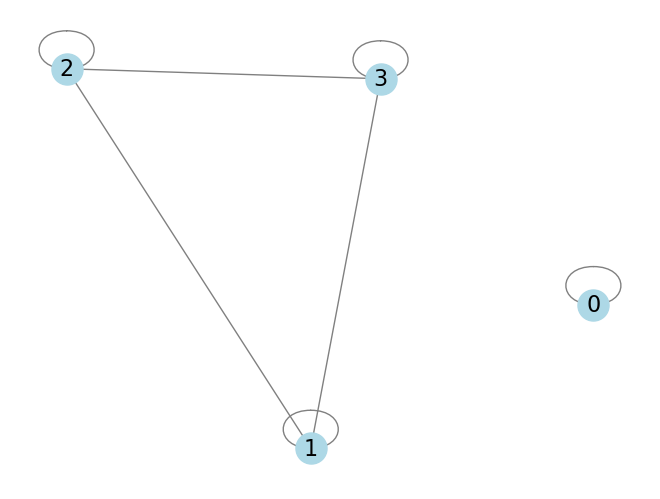

In [13]:
G = nx.from_numpy_array(submatrix)
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=16)
plt.show()

In [15]:
# Example adjacency matrix
adj_matrix = np.array([
    [0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0]
])

# Create a NetworkX graph from the adjacency matrix
G = nx.from_numpy_array(adj_matrix)

# Find the connected components
connected_components = list(nx.connected_components(G))

# Function to get the adjacency matrix of a component
def get_adj_matrix(component, graph):
    subgraph = graph.subgraph(component)
    adj_matrix = nx.adjacency_matrix(subgraph).todense()
    return adj_matrix

# Output the connected components and their adjacency matrices
# Find the one with the largest spectral radius
max_perron_val, perron_component = 0, 0
for i, component in enumerate(connected_components):
    adj_matrix = get_adj_matrix(component, G)
    spec_rad = np.max(np.abs(np.linalg.eigvals(adj_matrix)))
    if spec_rad > max_perron_val:
        max_perron_val = spec_rad
        perron_component = i
    print(f"Component: {component}")
    print("Adjacency matrix:")
    print(adj_matrix)

print(max_perron_val, perron_component)

Component: {0, 1, 2}
Adjacency matrix:
[[0 1 0]
 [1 0 1]
 [0 1 0]]
Component: {3, 4}
Adjacency matrix:
[[0 1]
 [1 0]]
1.4142135623730951 0
